In [ ]:
#pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [5]:
df = pd.read_csv("hospital data analysis.csv")

# View sample data
print(df.head())

   Patient_ID  Age  Gender      Condition                 Procedure   Cost  \
0           1   45  Female  Heart Disease               Angioplasty  15000   
1           2   60    Male       Diabetes           Insulin Therapy   2000   
2           3   32  Female  Fractured Arm          X-Ray and Splint    500   
3           4   75    Male         Stroke    CT Scan and Medication  10000   
4           5   50  Female         Cancer  Surgery and Chemotherapy  25000   

   Length_of_Stay Readmission    Outcome  Satisfaction  
0               5          No  Recovered             4  
1               3         Yes     Stable             3  
2               1          No  Recovered             5  
3               7         Yes     Stable             2  
4              10          No  Recovered             4  


In [6]:
# Convert data types
df["Readmission"] = df["Readmission"].map({"Yes": 1, "No": 0})  # Convert to 0/1 for analysis
df["Length_of_Stay"] = pd.to_numeric(df["Length_of_Stay"], errors="coerce")
df["Satisfaction"] = pd.to_numeric(df["Satisfaction"], errors="coerce")
df["Cost"] = pd.to_numeric(df["Cost"], errors="coerce")

In [ ]:
print(df.head())

   Patient_ID  Age  Gender      Condition                 Procedure   Cost  \
0           1   45  Female  Heart Disease               Angioplasty  15000   
1           2   60    Male       Diabetes           Insulin Therapy   2000   
2           3   32  Female  Fractured Arm          X-Ray and Splint    500   
3           4   75    Male         Stroke    CT Scan and Medication  10000   
4           5   50  Female         Cancer  Surgery and Chemotherapy  25000   

   Length_of_Stay  Readmission    Outcome  Satisfaction  
0               5            0  Recovered             4  
1               3            1     Stable             3  
2               1            0  Recovered             5  
3               7            1     Stable             2  
4              10            0  Recovered             4  


In [ ]:
#handle missing values

In [7]:
df.dropna(subset=["Length_of_Stay", "Readmission", "Satisfaction"], inplace=True)
df.fillna({"Cost": df["Cost"].median()}, inplace=True)  # Fill cost with median

In [8]:
#nan values
nan_counts = df[['Age', 'Readmission']].isna().sum()
total_rows = len(df)

nan_percentage = (nan_counts / total_rows) * 100

print("NaN counts:\n", nan_counts)
print("\nNaN percentage:\n", nan_percentage)

NaN counts:
 Age            0
Readmission    0
dtype: int64

NaN percentage:
 Age            0.0
Readmission    0.0
dtype: float64


# Data Analysis

<ipython-input-8-7e6ff575ac4f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stay_by_condition.index, y=stay_by_condition.values, palette="viridis")


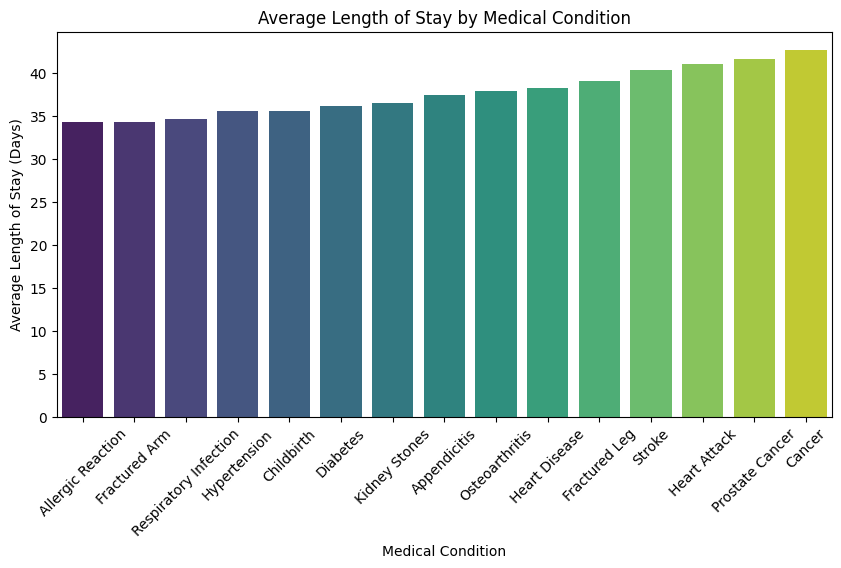

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Condition and calculate average stay
stay_by_condition = df.groupby("Condition")["Length_of_Stay"].mean().sort_values()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=stay_by_condition.index, y=stay_by_condition.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Medical Condition")
plt.ylabel("Average Length of Stay (Days)")
plt.title("Average Length of Stay by Medical Condition")
plt.show()

<ipython-input-9-fe6dc36628e9>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  readmission_rates = df.groupby("Age Group")["Readmission"].mean()


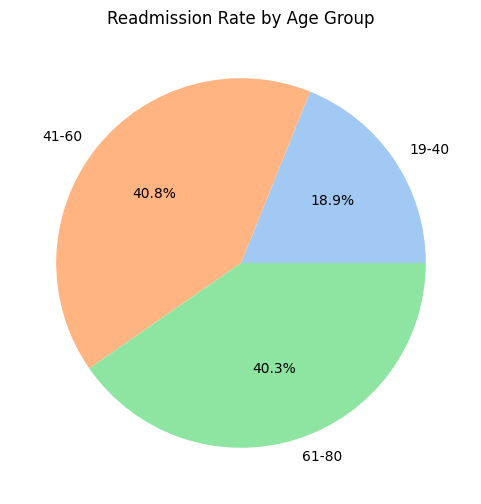

In [ ]:
# Create Age Groups
df["Age Group"] = pd.cut(df["Age"], bins=[0, 18, 40, 60, 80, 100], labels=["0-18", "19-40", "41-60", "61-80", "81+"])

# Calculate Readmission Rate per Age Group
readmission_rates = df.groupby("Age Group")["Readmission"].mean()

# Drop NaN values from readmission_rates before plotting
readmission_rates = readmission_rates.dropna()

# Plot
plt.figure(figsize=(6,6))
plt.pie(readmission_rates, labels=readmission_rates.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Readmission Rate by Age Group")
plt.show()

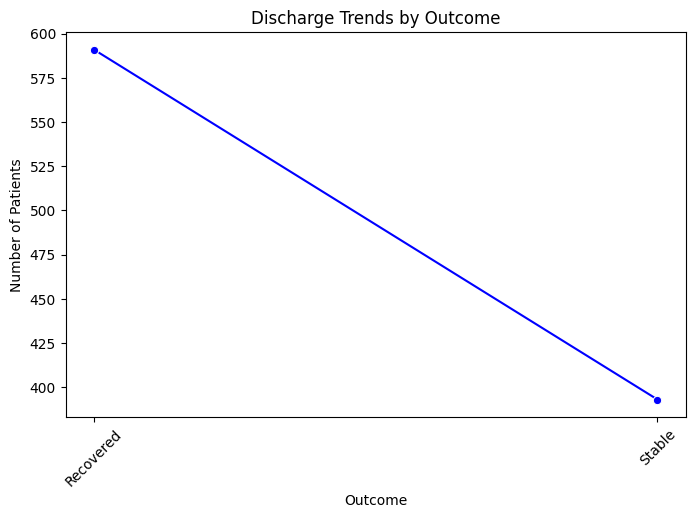

In [ ]:
# Count outcomes over time
discharge_trends = df.groupby("Outcome").size()

# Plot
plt.figure(figsize=(8,5))
sns.lineplot(x=discharge_trends.index, y=discharge_trends.values, marker="o", color="b")
plt.xticks(rotation=45)
plt.xlabel("Outcome")
plt.ylabel("Number of Patients")
plt.title("Discharge Trends by Outcome")
plt.show()


<ipython-input-11-fa35c3c53f02>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=satisfaction_by_procedure.index, y=satisfaction_by_procedure.values, palette="coolwarm")


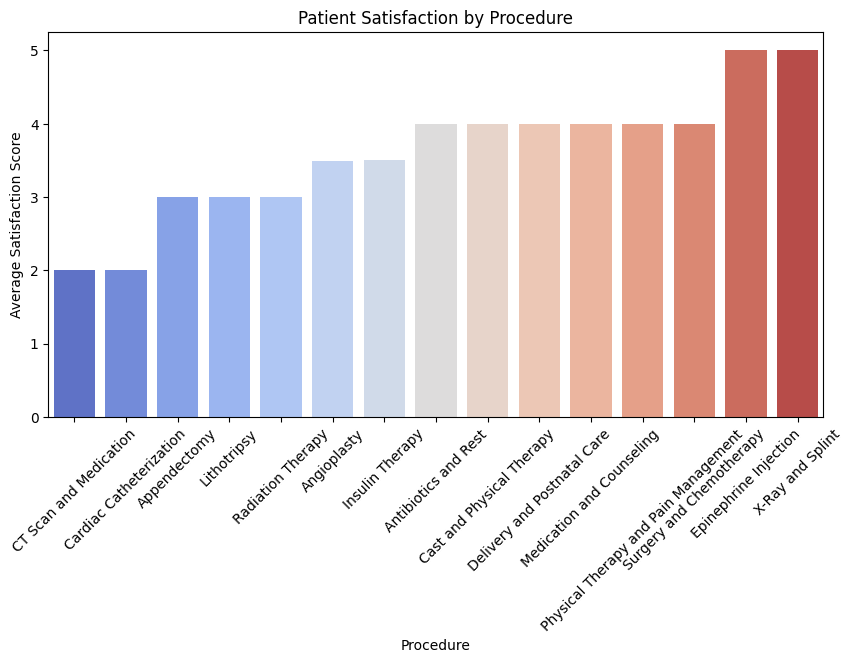

In [ ]:
# Group by Procedure and get average satisfaction score
satisfaction_by_procedure = df.groupby("Procedure")["Satisfaction"].mean().sort_values()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=satisfaction_by_procedure.index, y=satisfaction_by_procedure.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Procedure")
plt.ylabel("Average Satisfaction Score")
plt.title("Patient Satisfaction by Procedure")
plt.show()

<ipython-input-12-e8b86c785264>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cost_by_condition.index, y=cost_by_condition.values, palette="Blues_r")


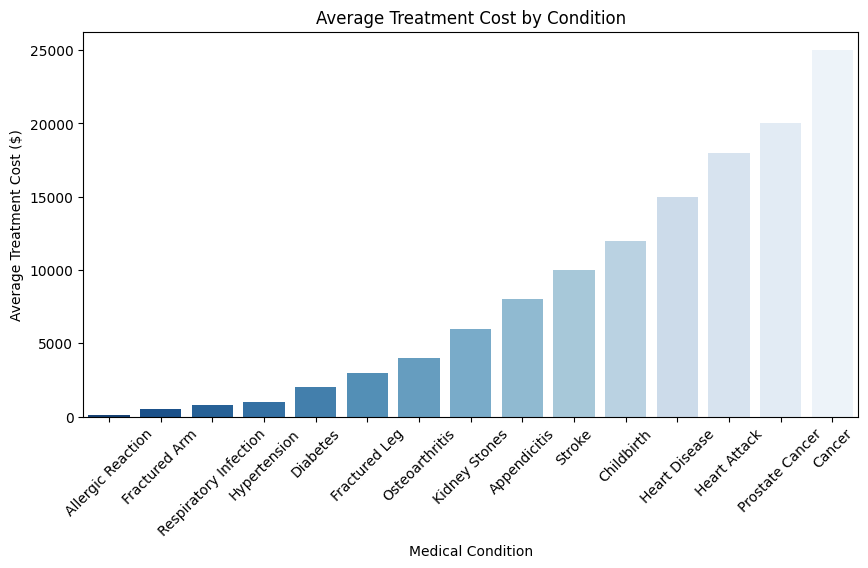

In [ ]:
# Group by Condition and calculate average cost
cost_by_condition = df.groupby("Condition")["Cost"].mean().sort_values()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=cost_by_condition.index, y=cost_by_condition.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Medical Condition")
plt.ylabel("Average Treatment Cost ($)")
plt.title("Average Treatment Cost by Condition")
plt.show()

In [ ]:
import streamlit as st
import plotly.express as px  # Import plotly.express

st.title("🏥 Patient Stay & Discharge Analytics")

st.subheader("📊 Average Length of Stay by Medical Condition")
st.bar_chart(stay_by_condition)

st.subheader("📈 Readmission Rate by Age Group")
fig = px.pie(readmission_rates, values=readmission_rates.values, names=readmission_rates.index, title="Readmission Rate by Age Group") # Create the pie chart using plotly.express
st.plotly_chart(fig)  # Display the pie chart using st.plotly_chart

st.subheader("📉 Discharge Trends by Outcome")
st.line_chart(discharge_trends)

st.subheader("💰 Average Treatment Cost by Condition")
st.bar_chart(cost_by_condition)

2025-03-08 15:47:44.242 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-08 15:47:44.528 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-08 15:47:44.532 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-08 15:47:44.533 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-08 15:47:44.535 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-08 15:47:45.132 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-08 15:47:45.136 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-08 15:47:45.138 Thread 'MainThread': mi

DeltaGenerator()

# ML Models

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#X = df[['Age', 'Gender', 'Condition', 'Procedure', 'Cost', 'Length_of_Stay', 'Outcome', 'Satisfaction']]
#y = df['Readmission']

In [10]:
print(df.head())

   Patient_ID  Age  Gender      Condition                 Procedure   Cost  \
0           1   45  Female  Heart Disease               Angioplasty  15000   
1           2   60    Male       Diabetes           Insulin Therapy   2000   
2           3   32  Female  Fractured Arm          X-Ray and Splint    500   
3           4   75    Male         Stroke    CT Scan and Medication  10000   
4           5   50  Female         Cancer  Surgery and Chemotherapy  25000   

   Length_of_Stay  Readmission    Outcome  Satisfaction  
0               5            0  Recovered             4  
1               3            1     Stable             3  
2               1            0  Recovered             5  
3               7            1     Stable             2  
4              10            0  Recovered             4  


In [11]:
# Drop non-relevant columns
df = df.drop(columns=['Patient_ID'])

# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender', 'Condition', 'Procedure', 'Outcome'], drop_first=True)

# Define Features (X) and Target (y)
X = df_encoded.drop(columns=['Readmission'])  # Features
y = df_encoded['Readmission']  # Target (0 or 1)

# Split data into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (Optional but recommended for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

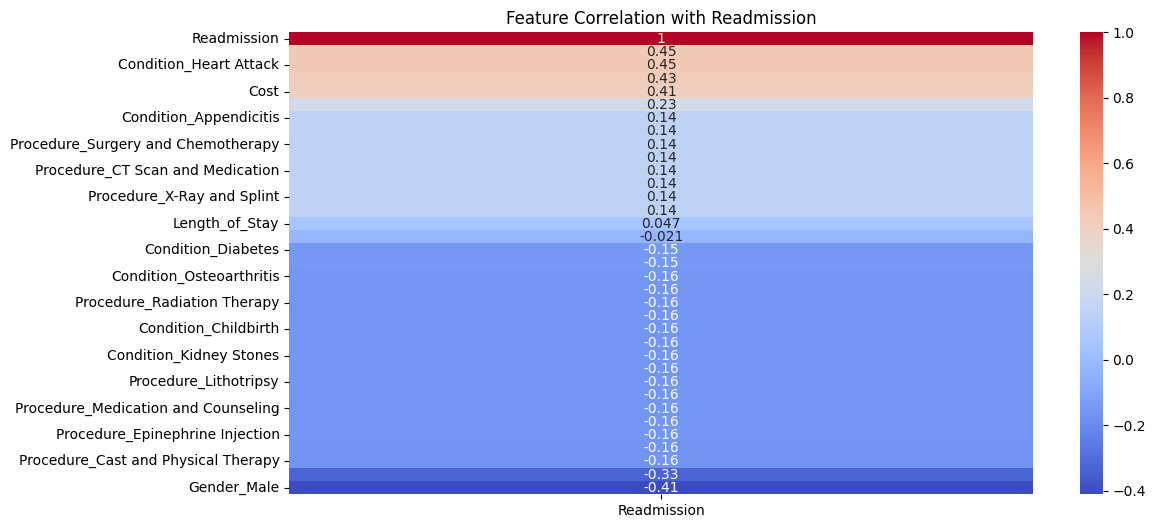

In [ ]:
# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix[['Readmission']].sort_values(by='Readmission', ascending=False), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Readmission")
plt.show()


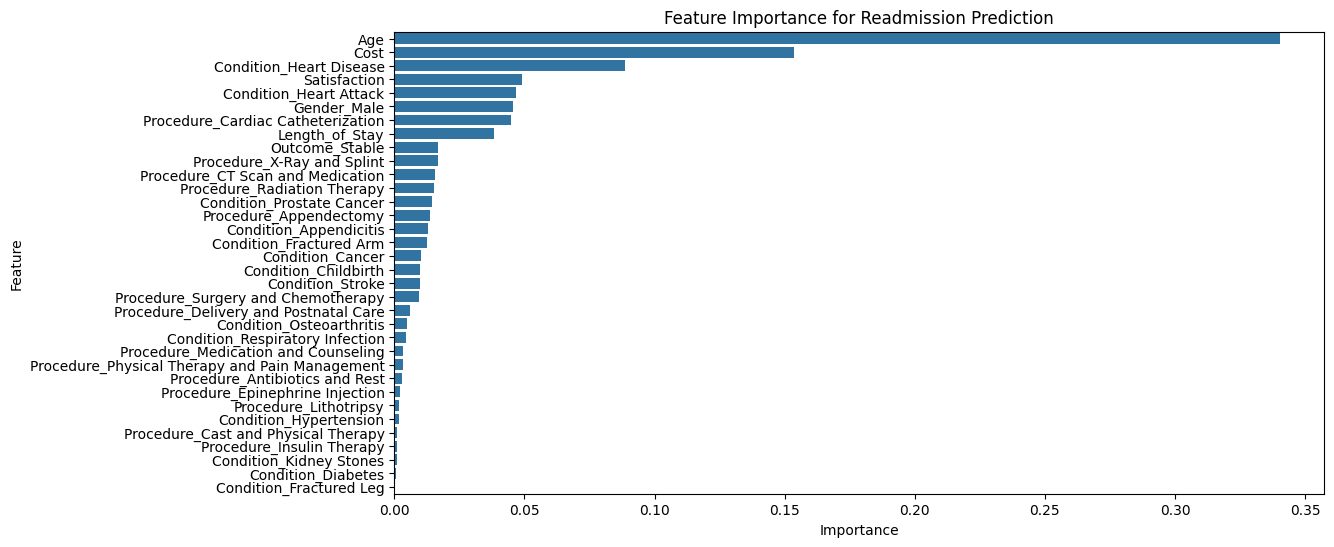

In [ ]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'])
plt.title("Feature Importance for Readmission Prediction")
plt.show()


In [12]:
# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test_scaled)

# Evaluate Model
print("Logistic Regression Results:")
print(accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Results:
0.8730964467005076
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       138
           1       0.81      0.75      0.78        59

    accuracy                           0.87       197
   macro avg       0.85      0.84      0.84       197
weighted avg       0.87      0.87      0.87       197



In [14]:
import joblib

# Save model
joblib.dump(log_reg, "readmission_model.pkl")

# Save the scaler (if used)
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [16]:
print(scaler.feature_names_in_)

['Age' 'Cost' 'Length_of_Stay' 'Satisfaction' 'Gender_Male'
 'Condition_Appendicitis' 'Condition_Cancer' 'Condition_Childbirth'
 'Condition_Diabetes' 'Condition_Fractured Arm' 'Condition_Fractured Leg'
 'Condition_Heart Attack' 'Condition_Heart Disease'
 'Condition_Hypertension' 'Condition_Kidney Stones'
 'Condition_Osteoarthritis' 'Condition_Prostate Cancer'
 'Condition_Respiratory Infection' 'Condition_Stroke'
 'Procedure_Antibiotics and Rest' 'Procedure_Appendectomy'
 'Procedure_CT Scan and Medication' 'Procedure_Cardiac Catheterization'
 'Procedure_Cast and Physical Therapy'
 'Procedure_Delivery and Postnatal Care' 'Procedure_Epinephrine Injection'
 'Procedure_Insulin Therapy' 'Procedure_Lithotripsy'
 'Procedure_Medication and Counseling'
 'Procedure_Physical Therapy and Pain Management'
 'Procedure_Radiation Therapy' 'Procedure_Surgery and Chemotherapy'
 'Procedure_X-Ray and Splint' 'Outcome_Stable']


In [18]:
import streamlit as st
import pandas as pd
import joblib

# Load the trained model and scaler
model = joblib.load("readmission_model.pkl")
scaler = joblib.load("scaler.pkl")

# Streamlit UI
st.title("Hospital Readmission Prediction App")
st.write("Enter patient details to predict the likelihood of readmission.")

# Input Fields
age = st.number_input("Age", min_value=0, max_value=120, value=45)
gender = st.selectbox("Gender", ["Male", "Female"])
condition = st.selectbox("Condition", ["Heart Disease", "Diabetes", "Fractured Arm", "Stroke", "Cancer"])
procedure = st.selectbox("Procedure", ["Insulin Therapy", "X-Ray and Splint", "CT Scan and Medication", "Surgery and Chemotherapy"])
cost = st.number_input("Treatment Cost", min_value=0, value=5000)
length_of_stay = st.number_input("Length of Stay (days)", min_value=0, value=3)
satisfaction = st.slider("Patient Satisfaction (1-5)", 1, 5, 3)

# List of all possible feature names used in training (modify as needed)
expected_features = [
    "Age", "Cost", "Length_of_Stay", "Satisfaction",
    "Gender_Male", "Condition_Appendicitis","Condition_Cancer",
 "Condition_Childbirth", "Condition_Diabetes",  "Condition_Fractured Arm",
 "Condition_Fractured Leg", "Condition_Heart Attack", "Condition_Heart Disease",
 "Condition_Hypertension", "Condition_Kidney Stones",
 "Condition_Osteoarthritis", "Condition_Prostate Cancer",
 "Condition_Respiratory Infection", "Condition_Stroke",
 "Procedure_Antibiotics and Rest", "Procedure_Appendectomy",
 "Procedure_CT Scan and Medication", "Procedure_Cardiac Catheterization",
 "Procedure_Cast and Physical Therapy",
 "Procedure_Delivery and Postnatal Care", "Procedure_Epinephrine Injection",
 "Procedure_Insulin Therapy", "Procedure_Lithotripsy",
 "Procedure_Medication and Counseling",
 "Procedure_Physical Therapy and Pain Management",
 "Procedure_Radiation Therapy", "Procedure_Surgery and Chemotherapy",
 "Procedure_X-Ray and Splint", "Outcome_Stable"
]

# Create a dictionary with all features initialized to 0
input_data_dict = {feature: 0 for feature in expected_features}

# Fill in user inputs
input_data_dict["Age"] = age
input_data_dict["Cost"] = cost
input_data_dict["Length_of_Stay"] = length_of_stay
input_data_dict["Satisfaction"] = satisfaction
input_data_dict[f"Gender_{gender}"] = 1
input_data_dict[f"Condition_{condition}"] = 1
input_data_dict[f"Procedure_{procedure}"] = 1

# Convert to DataFrame
input_data = pd.DataFrame([input_data_dict])

# Scale the numeric data
input_data_scaled = scaler.transform(input_data)

# Predict Readmission
if st.button("Predict Readmission"):
    prediction = model.predict(input_data_scaled)
    result = "Likely Readmitted" if prediction[0] == 1 else "Not Likely Readmitted"
    st.write(f"**Prediction:** {result}")


2025-03-11 22:33:48.370 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 22:33:48.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 22:33:48.373 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 22:33:48.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 22:33:48.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 22:33:48.378 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 22:33:48.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 22:33:48.381 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

# Chatbot

In [ ]:
pip install openai

In [ ]:
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

In [ ]:
# Function to get GPT-4 response
def get_chatbot_response(prompt):
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}]
    )
    return response["choices"][0]["message"]["content"]

# Chatbot interface
st.header("💬 Healthcare Chatbot")
user_input = st.text_input("Ask me anything about healthcare data!")

if user_input:
    ai_response = get_chatbot_response(user_input)
    st.write(f"🤖 Chatbot: {ai_response}")


2025-03-09 17:29:46.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 17:29:46.722 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 17:29:46.724 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 17:29:46.729 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 17:29:46.733 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 17:29:46.734 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 17:29:46.735 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 17:29:46.741 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar